In [1]:
#(1)ドライブをマウント
#(2)学習済みモデルのあるディレクトリに移動

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive

/content/drive


In [4]:
cd My Drive

/content/drive/My Drive


In [5]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
from PIL import Image
from torchvision import models, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
from torchvision import datasets

In [ ]:
#!pip install pytorch-lightning

     |████████████████████████████████| 204kB 2.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 829kB 37.5MB/s 
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=e7ed4a6337954bce167ba7f94e22373c2878e01b7d012ad4f46e0f51b7cdcfd9
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: tqdm 4.38.0
    Uninstalling tqdm-4.38.0:
      Successfully uninstalled tqdm-4.38.0
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [7]:
#モデル読み込み

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
use_pretrained = True  # 学習済みのパラメータを使用
model = models.densenet161(pretrained=use_pretrained).to(device)

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


In [9]:
#モデルを10クラスに適用

In [10]:
model.classifier = nn.Linear(in_features=2208, out_features=6, bias=True).to(device)

In [11]:
#モデルを読み込む
device = torch.device("cuda")
#model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load("checkpoint.pt"))
model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [49]:
transform_test = transforms.Compose([
    transforms.Resize(224), #サイズ合わせ
    transforms.CenterCrop(224),
    transforms.ToTensor() ,              #型変換(?)
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  #https://teratail.com/questions/234027
    
    ])

In [50]:
#テスト画像読み込み

In [51]:
your_datasets = datasets.ImageFolder(root="jikken_hanbetu", transform=transform_test) 

In [52]:
your_datasets

Dataset ImageFolder
    Number of datapoints: 600
    Root location: jikken_hanbetu
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [53]:
#your_datasets[画像番号][0:画像データ,1:ラベル]

In [54]:
#your_datasets[0～99][1]：ラベル0：airplane
#your_datasets[100～199][1]：ラベル1：bird
#your_datasets[200～299][1]：ラベル2：car
#your_datasets[300～399][1]：ラベル3：cat
#your_datasets[400～499][1]：ラベル4：deer
#your_datasets[500～599][1]：ラベル5：dog
#your_datasets[600～699][1]：ラベル6：horse
#your_datasets[700～799][1]：ラベル7：monkey
#your_datasets[800～899][1]：ラベル8：ship
#your_datasets[900～999][1]：ラベル9：truck

classes = ("jui","ocha","piza","pop","pre","toppo")

#　※ディレクトリの順番がa～z順になっていない場合は多分ずれるのでラベルに注意して書き換える

In [55]:
your_datasets[0][0].shape

torch.Size([3, 224, 224])

In [56]:
#画像を代入：実行時間が長いため注意
"""
img = []
for ii in range(1000):
  img.append(np.transpose(your_datasets[ii][0],(1,2,0)))
  #img.shape

"""
img = []
img.append(np.transpose(your_datasets[50][0],(1,2,0)))
img[0].shape


torch.Size([224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


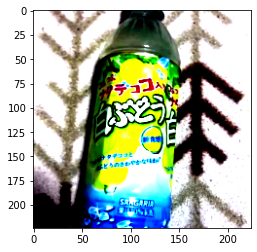

In [57]:
#画像表示
plt.imshow(img[0])

In [58]:
#ラベル確認
#your_datasets[799][1]

In [59]:
#一枚のみ判別する場合
"""
TEST = your_datasets[0][0].unsqueeze(0)
TEST.shape
"""

'\nTEST = your_datasets[0][0].unsqueeze(0)\nTEST.shape\n'

In [60]:
# 評価モードにする
model = model.eval()

In [61]:
#　※ディレクトリの順番がa～z順になっていない場合は多分ずれるのでif分の中を書き換える
jui = 0
ocha = 0
piza = 0
pop =0
pre = 0
toppo = 0
totall= 0

for ii in range(600):
   TEST = your_datasets[ii][0].unsqueeze(0) 
   TEST = TEST.cuda() 
   y_predict = model.forward(TEST)
   print(ii,  " : ", classes[y_predict[0].argmax()])

   if y_predict[0].argmax() == your_datasets[ii][1]:
      if 0 <= ii <=99:
           jui+=1
           totall+=1
      if 100 <= ii <=199:
           ocha+=1
           totall+=1
      if 200 <= ii <=299:
           piza+=1
           totall+=1
      if 300 <= ii <=399:
           pop+=1
           totall+=1
      if 400 <= ii <=499:
           pre+=1
           totall+=1
      if 500 <= ii <=599:
           toppo+=1
           totall+=1
      

print("正解数")
print("jui  ：",jui)
print("ocha      ：",ocha)
print("piza       ：",piza)
print("pop       ：",pop)
print("pre      ：",pre)
print("toppo       ：",toppo)

print("------------------")
print("合計正解数：",totall)
print("正答率    ：",(totall/600)*100,"%")

0  :  jui
1  :  jui
2  :  jui
3  :  jui
4  :  jui
5  :  jui
6  :  jui
7  :  jui
8  :  jui
9  :  jui
10  :  jui
11  :  jui
12  :  jui
13  :  jui
14  :  jui
15  :  jui
16  :  jui
17  :  jui
18  :  jui
19  :  jui
20  :  jui
21  :  jui
22  :  jui
23  :  jui
24  :  jui
25  :  jui
26  :  jui
27  :  jui
28  :  jui
29  :  jui
30  :  jui
31  :  jui
32  :  jui
33  :  jui
34  :  jui
35  :  jui
36  :  jui
37  :  jui
38  :  jui
39  :  jui
40  :  jui
41  :  jui
42  :  jui
43  :  jui
44  :  jui
45  :  jui
46  :  jui
47  :  jui
48  :  jui
49  :  jui
50  :  jui
51  :  jui
52  :  jui
53  :  jui
54  :  jui
55  :  jui
56  :  jui
57  :  jui
58  :  jui
59  :  jui
60  :  jui
61  :  jui
62  :  jui
63  :  jui
64  :  jui
65  :  jui
66  :  jui
67  :  jui
68  :  jui
69  :  jui
70  :  jui
71  :  jui
72  :  jui
73  :  jui
74  :  jui
75  :  jui
76  :  jui
77  :  jui
78  :  jui
79  :  jui
80  :  jui
81  :  jui
82  :  jui
83  :  jui
84  :  jui
85  :  jui
86  :  jui
87  :  jui
88  :  jui
89  :  jui
90  :  jui
91  :  ju